# **5. SARIMAX Model**

## Imports

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import pmdarima as pmd



In [61]:
df = pd.read_csv('data/total_store_sales.csv')

In [62]:
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,2010-02-05,49750740.5,33.3,2.7,0.0,0.0,0.0,0.0,0.0,167.4,8.6,0.0
1,2010-02-12,48336677.6,33.4,2.7,0.0,0.0,0.0,0.0,0.0,167.4,8.6,1.0
2,2010-02-19,48276993.8,37.0,2.7,0.0,0.0,0.0,0.0,0.0,167.3,8.6,0.0
3,2010-02-26,43968571.1,38.6,2.7,0.0,0.0,0.0,0.0,0.0,167.7,8.6,0.0
4,2010-03-05,46871470.3,42.4,2.7,0.0,0.0,0.0,0.0,0.0,167.7,8.6,0.0


In [63]:
# Split date up into year, month, week, day for more
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [64]:
df.set_index('Date', inplace=True)

In [65]:
df.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Year,Month,Week
Date,,,,,,,,,,,,,,,
2010-02-05,49750740.5,33.3,2.7,0.0,0.0,0.0,0.0,0.0,167.4,8.6,0.0,5,2010,2,5
2010-02-12,48336677.6,33.4,2.7,0.0,0.0,0.0,0.0,0.0,167.4,8.6,1.0,12,2010,2,6
2010-02-19,48276993.8,37.0,2.7,0.0,0.0,0.0,0.0,0.0,167.3,8.6,0.0,19,2010,2,7
2010-02-26,43968571.1,38.6,2.7,0.0,0.0,0.0,0.0,0.0,167.7,8.6,0.0,26,2010,2,8
2010-03-05,46871470.3,42.4,2.7,0.0,0.0,0.0,0.0,0.0,167.7,8.6,0.0,5,2010,3,9


In [66]:
# Helper function for evalution metrics
def evaluation_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2score = r2_score(y_test,y_pred)
    
    print(f'Mean Squared Error = {mse}')
    print(f'Mean Absolute Error = {mae}')
    print(f'Root Mean Squared Error = {rmse}')
    print(f'r2 score = {r2score}')

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [67]:
X = df.drop(columns='Weekly_Sales')
y = df[['Weekly_Sales']]

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False, random_state=123)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

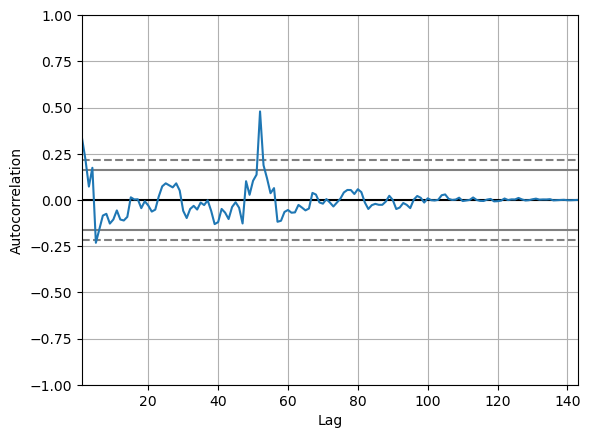

In [69]:
autocorrelation_plot(df[['Weekly_Sales']])
plt.savefig('imgs/autocorr.png', dpi = 192);

In [70]:
dftest = adfuller(df['Weekly_Sales'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.908297945984597
2. P-Value :  2.675979313122921e-07
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 138
5. Critical Values :
	 1% :  -3.47864788917503
	 5% :  -2.882721765644168
	 10% :  -2.578065326612056


p-value below 0.05, can assume data is stationary

In [71]:
model = pmd.auto_arima(df['Weekly_Sales'],start_p=1,start_q=1,test='adf',m=52,seasonal=True,trace=True)
# model = pmd.auto_arima(y_train,start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=4783.566, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.691, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.381, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.927, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.768, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=4790.386, Time=0.43 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=4783.296, Time=1.81 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=4830.601, Time=0.03 sec
 ARIMA(1,0,1)(2,0,0)[52] intercept   : AIC=4785.193, Time=7.73 sec
 ARIMA(1,0,1)(2,0,1)[52] intercept   : AIC=inf, Time=11.34 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=4835.823, Time=0.34 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.475, Time=1.71 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=4831.381, Time=0.05 sec
 ARIMA(2,0,1)(2,0,0)[52] intercept   : AIC=4780.889, Time=9.18 sec
 ARIMA(2,0,1)(1,0,1)[52

In [72]:
sarima=SARIMAX(df['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
# sarima=SARIMAX(y_train,order=(2,0,0),seasonal_order=(0,0,0,12))
predicted=sarima.fit().predict();predicted

C:\Users\johng\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\johng\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\johng\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\johng\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\johng\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning

2010-02-05    0.000000e+00
2010-02-12    4.886791e+07
2010-02-19    4.857230e+07
2010-02-26    4.826151e+07
2010-03-05    4.665405e+07
                  ...     
2012-09-28    4.381335e+07
2012-10-05    4.715829e+07
2012-10-12    4.525124e+07
2012-10-19    4.650623e+07
2012-10-26    4.596802e+07
Freq: W-FRI, Name: predicted_mean, Length: 143, dtype: float64

In [77]:
predicted1 = predicted.to_frame().reset_index()
predicted2 = predicted1.rename(columns = {'index': 'Date'})
predicted2['Date'] = pd.to_datetime(predicted2['Date'])
predicted2

,Date,predicted_mean
0,2010-02-05,0.000000e+00
1,2010-02-12,4.886791e+07
2,2010-02-19,4.857230e+07
3,2010-02-26,4.826151e+07
4,2010-03-05,4.665405e+07
...,...,...
138,2012-09-28,4.381335e+07
139,2012-10-05,4.715829e+07
140,2012-10-12,4.525124e+07
141,2012-10-19,4.650623e+07


In [78]:
df.reset_index(inplace=True)
merged_df1 = pd.concat([predicted2, df], axis=1, ignore_index=False).drop(0)
merged_df1

,Date,predicted_mean,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Year,Month,Week
1,2010-02-12,4.886791e+07,2010-02-12,48336677.6,33.4,2.7,0.0,0.0,0.0,0.0,0.0,167.4,8.6,1.0,12,2010,2,6
2,2010-02-19,4.857230e+07,2010-02-19,48276993.8,37.0,2.7,0.0,0.0,0.0,0.0,0.0,167.3,8.6,0.0,19,2010,2,7
3,2010-02-26,4.826151e+07,2010-02-26,43968571.1,38.6,2.7,0.0,0.0,0.0,0.0,0.0,167.7,8.6,0.0,26,2010,2,8
4,2010-03-05,4.665405e+07,2010-03-05,46871470.3,42.4,2.7,0.0,0.0,0.0,0.0,0.0,167.7,8.6,0.0,5,2010,3,9
5,2010-03-12,4.631552e+07,2010-03-12,45925396.5,47.0,2.8,0.0,0.0,0.0,0.0,0.0,167.5,8.6,0.0,12,2010,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,4.381335e+07,2012-09-28,43734899.4,68.2,3.9,4891.0,19.1,5.3,1699.9,4243.3,175.9,7.2,0.0,28,2012,9,39
139,2012-10-05,4.715829e+07,2012-10-05,47566639.3,65.5,3.8,5042.3,0.0,20.0,2805.6,3618.9,176.0,6.9,0.0,5,2012,10,40
140,2012-10-12,4.525124e+07,2012-10-12,46128514.2,57.7,3.9,1955.2,0.0,16.8,557.2,5609.8,176.1,7.0,0.0,12,2012,10,41
141,2012-10-19,4.650623e+07,2012-10-19,45122410.6,60.2,3.9,1916.4,0.0,13.2,432.1,3306.2,176.3,6.9,0.0,19,2012,10,42


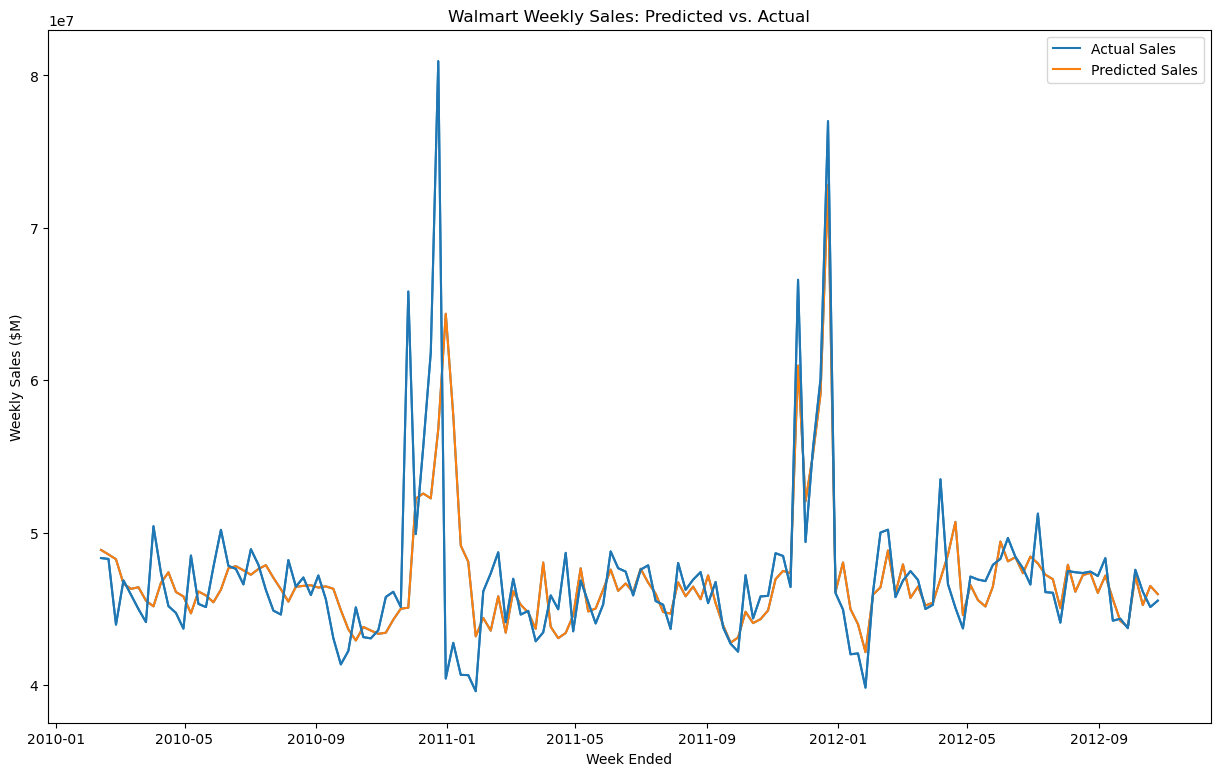

In [80]:
plt.figure(figsize = (15,9))
plt.plot(merged_df1['Date'], merged_df1['predicted_mean'])
plt.plot(merged_df1['Date'], merged_df1['Weekly_Sales'], color='tab:blue')
plt.xlabel('Week Ended')
plt.ylabel('Weekly Sales ($M)')
plt.title('Walmart Weekly Sales: Predicted vs. Actual')
plt.legend(['Actual Sales','Predicted Sales'])
plt.savefig('imgs/sarimax_actual_vs_pred1.png', dpi = 192)
plt.show();

In [81]:
evaluation_metrics(merged_df1['predicted_mean'], merged_df1['Weekly_Sales'])

Mean Squared Error = 18007958239831.23
Mean Absolute Error = 2162437.5996467294
Root Mean Squared Error = 4243578.471034939
r2 score = -0.18129771245436355


In [ ]:
# https://medium.com/@tirthamutha/time-series-forecasting-using-sarima-in-python-8b75cd3366f2